In [1]:
# РАЗДЕЛ 1. Решающее дерево


# 1. Импорт необходимых модулей
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 2. Настройка визуализации


In [2]:
# 3. Загрузка данных
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 4. Подготовка данных
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
X = pd.get_dummies(X) # - преобразование категориальных признаков
X = X.fillna({'Age':X.Age.median()})
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [6]:
# 5. Создаем дерево решений
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.score(X_train, y_train)

0.9798657718120806

In [9]:
clf.score(X_test, y_test)

0.7627118644067796

In [ ]:
# Делаем вывод что данное дерево решений переобучается, так как показатель качества на тестовой выборке значительно хуже чем на тренировочной.
# Посчитаем показатели для разных значений глубины дерева

In [10]:
train_score=list()
test_score=list()
for i in range(1,21):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

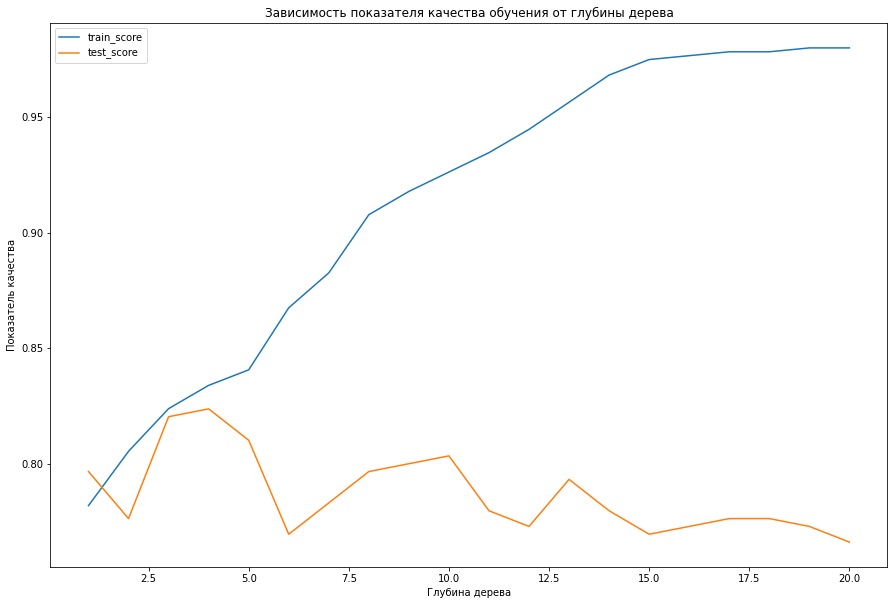

In [11]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()

ax.plot(range(1,21),train_score, label='train_score')
ax.plot(range(1,21),test_score, label='test_score')

# Подписи на осях, заголовок и легенда графика
plt.title('Зависимость показателя качества обучения от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Показатель качества')
plt.legend()

In [12]:
print(f"{train_score[2]} {test_score[2]}")

0.8238255033557047 0.8203389830508474


[Text(558.0, 713.475, 'Sex_male <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]\nclass = Died'),
 Text(279.0, 509.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]\nclass = Survived'),
 Text(139.5, 305.775, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]\nclass = Survived'),
 Text(69.75, 101.92499999999995, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(209.25, 101.92499999999995, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]\nclass = Survived'),
 Text(418.5, 305.775, 'Fare <= 23.35\nentropy = 0.996\nsamples = 99\nvalue = [53, 46]\nclass = Died'),
 Text(348.75, 101.92499999999995, 'entropy = 0.991\nsamples = 81\nvalue = [36, 45]\nclass = Survived'),
 Text(488.25, 101.92499999999995, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]\nclass = Died'),
 Text(837.0, 509.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]\nclass = Died'),
 Text(697.5, 305.775, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue

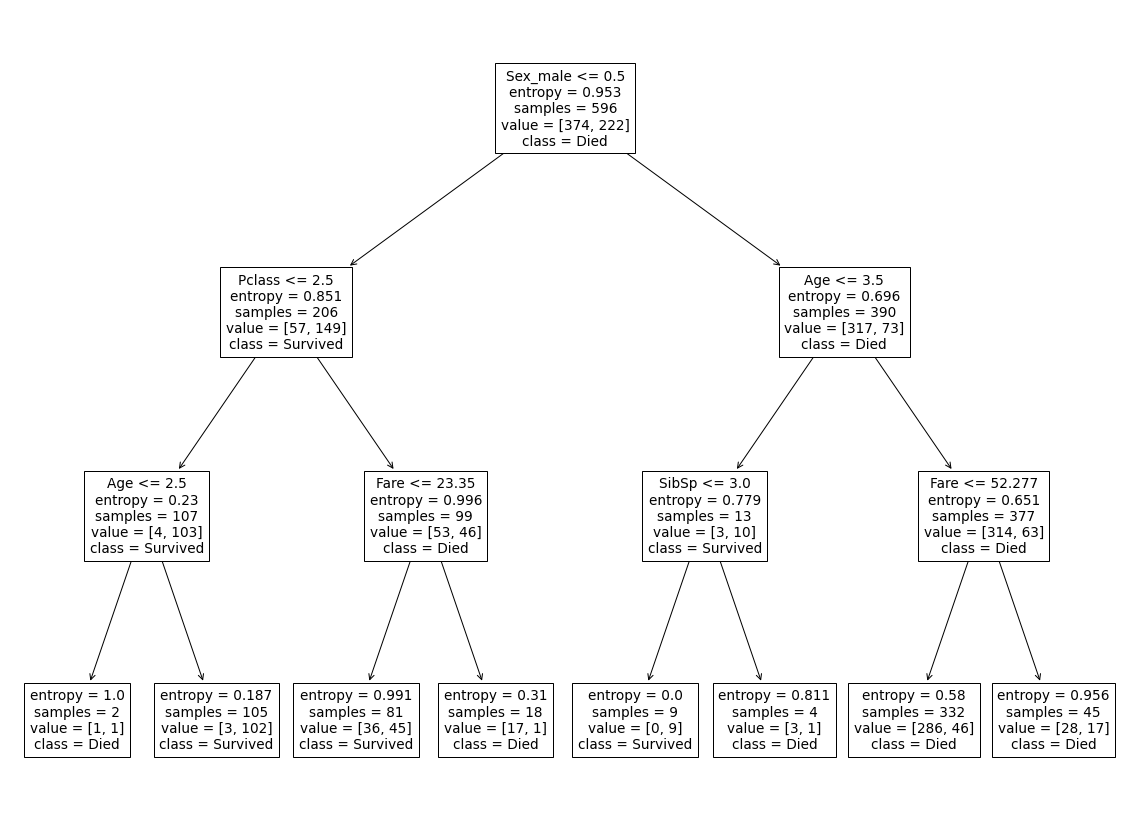

In [21]:
# Делаем вывод что наилучшим значением глубины дерева является 3, так как при этом значении графики близки и график для тестовой выборки максимален
# Построим дерево с глубиной 3

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'])